# Data Description

You can get data from Kaggle : https://www.kaggle.com/competitions/titanic/data

* Data Dictionary

| Feature | Definition | Key |
|:---|:---|:---|
| PassengerId | Unique ID of the passenger |  |
| Survived | Survival | 0 = No, 1 = Yes |
| Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| Name | Name of the passenger |  |
| Sex | Sex |  |
| Age | Age in years |  |
| SibSp | # of siblings / spouses aboard the Titanic |  |
| Parch | # of parents / children aboard the Titanic |  |
| Ticket | Ticket number |  |
| Fare | Passenger fare |  |
| Cabin | Cabin number |  |
| Embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |


* Data Dictionary

    * `pclass`: A proxy for socio-economic status (SES)
        - 1st = Upper
        - 2nd = Middle
        - 3rd = Lower

    * `age`: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

    * `sibsp`: The dataset defines family relations in this way...
        + Sibling = brother, sister, stepbrother, stepsister
        + Spouse = husband, wife (mistresses and fiancés were ignored)

    * `parch`: The dataset defines family relations in this way...
        + Parent = mother, father
        + Child = daughter, son, stepdaughter, stepson
        + Some children travelled only with a nanny, therefore parch=0 for them

# Importing Libraries

In [1]:
import pandas as pd;
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format','{:.2f}'.format)
sns.set()

# Exploring Data

In [2]:
df = pd.read_csv('data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [5]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
df.duplicated().sum()

0

In [7]:
round(df.isna().mean()*100,2)

PassengerId    0.00
Survived       0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age           19.87
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.00
Cabin         77.10
Embarked       0.22
dtype: float64

# Data Cleaning

- Missing Values can be dropped or imputed . Depend on the number of missing values


In [8]:
# Drop Null values of Embarked Feature
df.dropna(subset=['Embarked']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [9]:
# filling missing values of age based on Pclass and Sex
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()));

<ipython-input-9-47daa956557f>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()));


In [10]:
# Drop Unnecessary columns
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

#### Removing Outliers

<Axes: xlabel='Fare'>

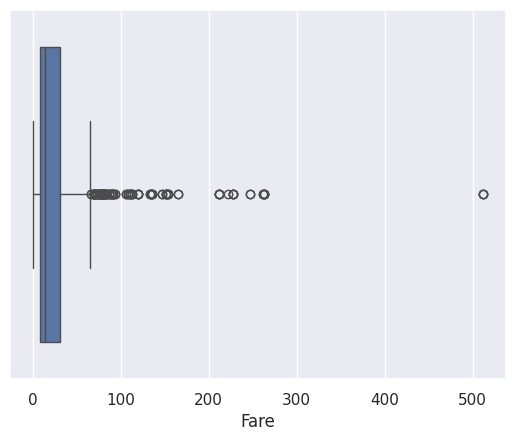

In [11]:
sns.boxplot(x = df.Fare)

In [12]:
df = df[df['Fare'] < 300]

#### Creating New Columns

In [13]:
df['Age_Group'] = pd.cut(df.Age, bins = [0,17,30,45,82], labels = ['Child','Young','Adult','Senior'])
df['Fare_Group'] = pd.cut(df.Fare,bins = [-0.9,8,15,35,265],labels=['low','medium','high','very high'])

<ipython-input-13-59208324cc08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Group'] = pd.cut(df.Age, bins = [0,17,30,45,82], labels = ['Child','Young','Adult','Senior'])
<ipython-input-13-59208324cc08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare_Group'] = pd.cut(df.Fare,bins = [-0.9,8,15,35,265],labels=['low','medium','high','very high'])


In [14]:
# Make columns name lower case
df.columns = df.columns.str.lower()

# Univariate Analysis

- We can deduce that the no. of the people that didn't survive is larger than the no. of people who has survived
- Men were more than women on the ship
- Most of the people didn't have any family with them
- Most of passengers embarked that the ship from Southampton
- Most of the ship passegners where young

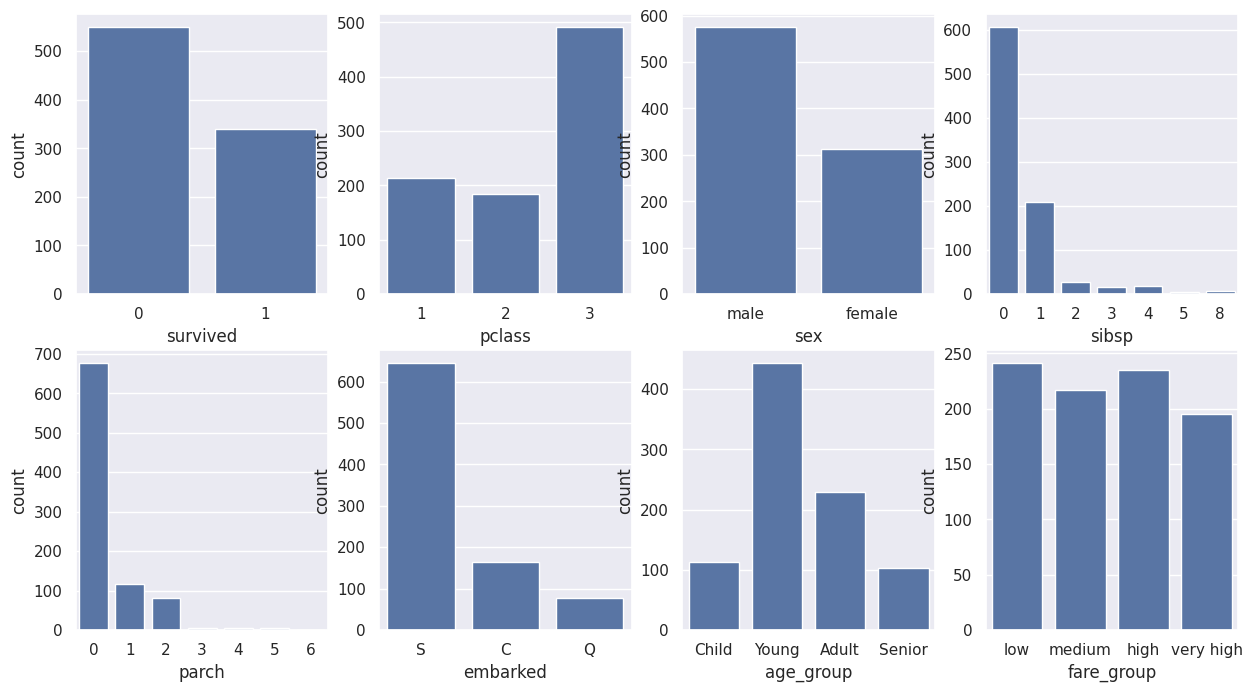

In [15]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
col = ['survived','pclass','sex','sibsp','parch','embarked','age_group','fare_group']
k =0
for i in range(2):
    for j in range(4):
        sns.countplot(data = df , x = col[k] , ax = axes[i][j])
        k += 1
plt.show()


<Axes: xlabel='fare', ylabel='Count'>

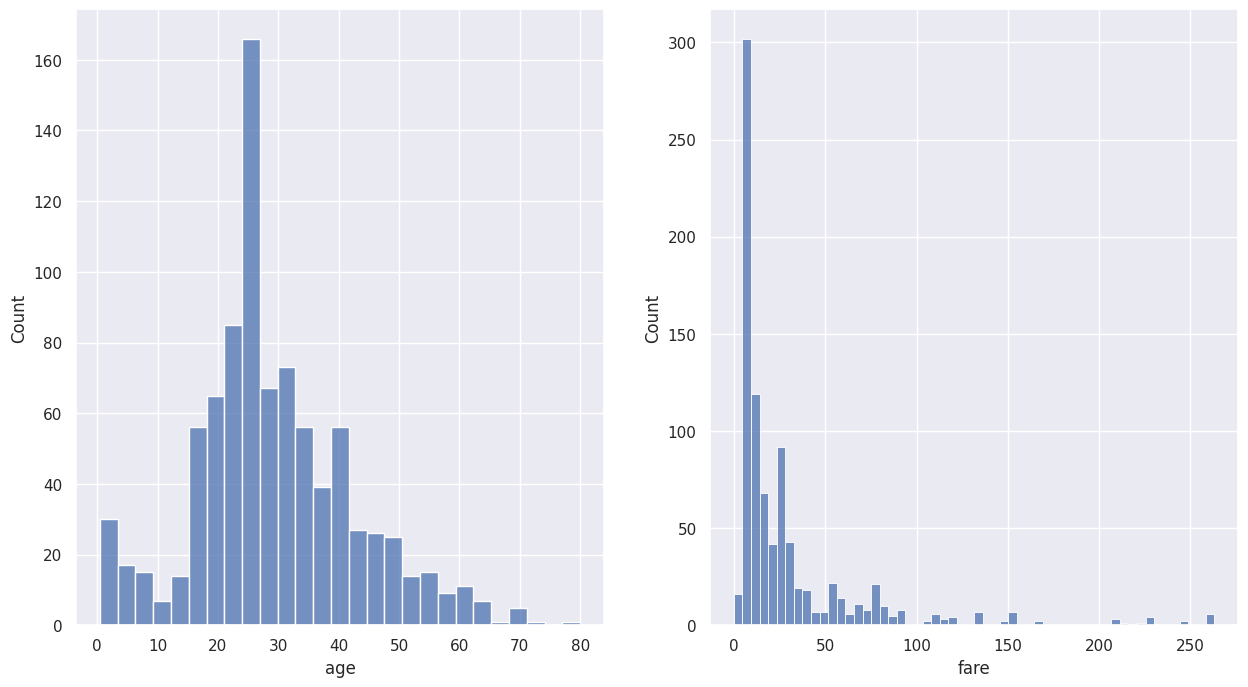

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.histplot(data = df , x = 'age' , ax = axes[0])
sns.histplot(data = df , x = 'fare' , ax = axes[1])

# Bivariate Analysis

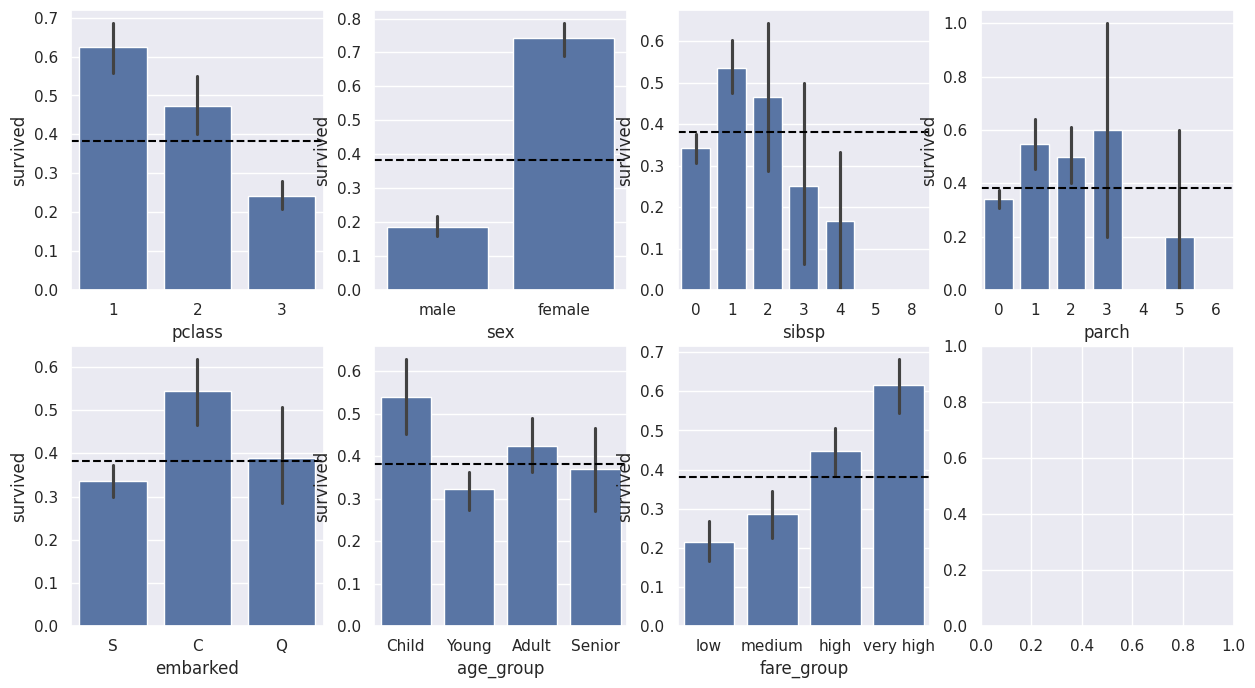

In [17]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
col = ['pclass','sex','sibsp','parch','embarked','age_group','fare_group']
k =0
for i in range(2):
    for j in range(4):
        if k != 7:
          sns.barplot(data = df , x = col[k] , y = 'survived', ax = axes[i][j])
          axes[i,j].axhline(df.survived.mean(), color='black', linestyle='--')
          k += 1
plt.show()


# Multivariate Analysis

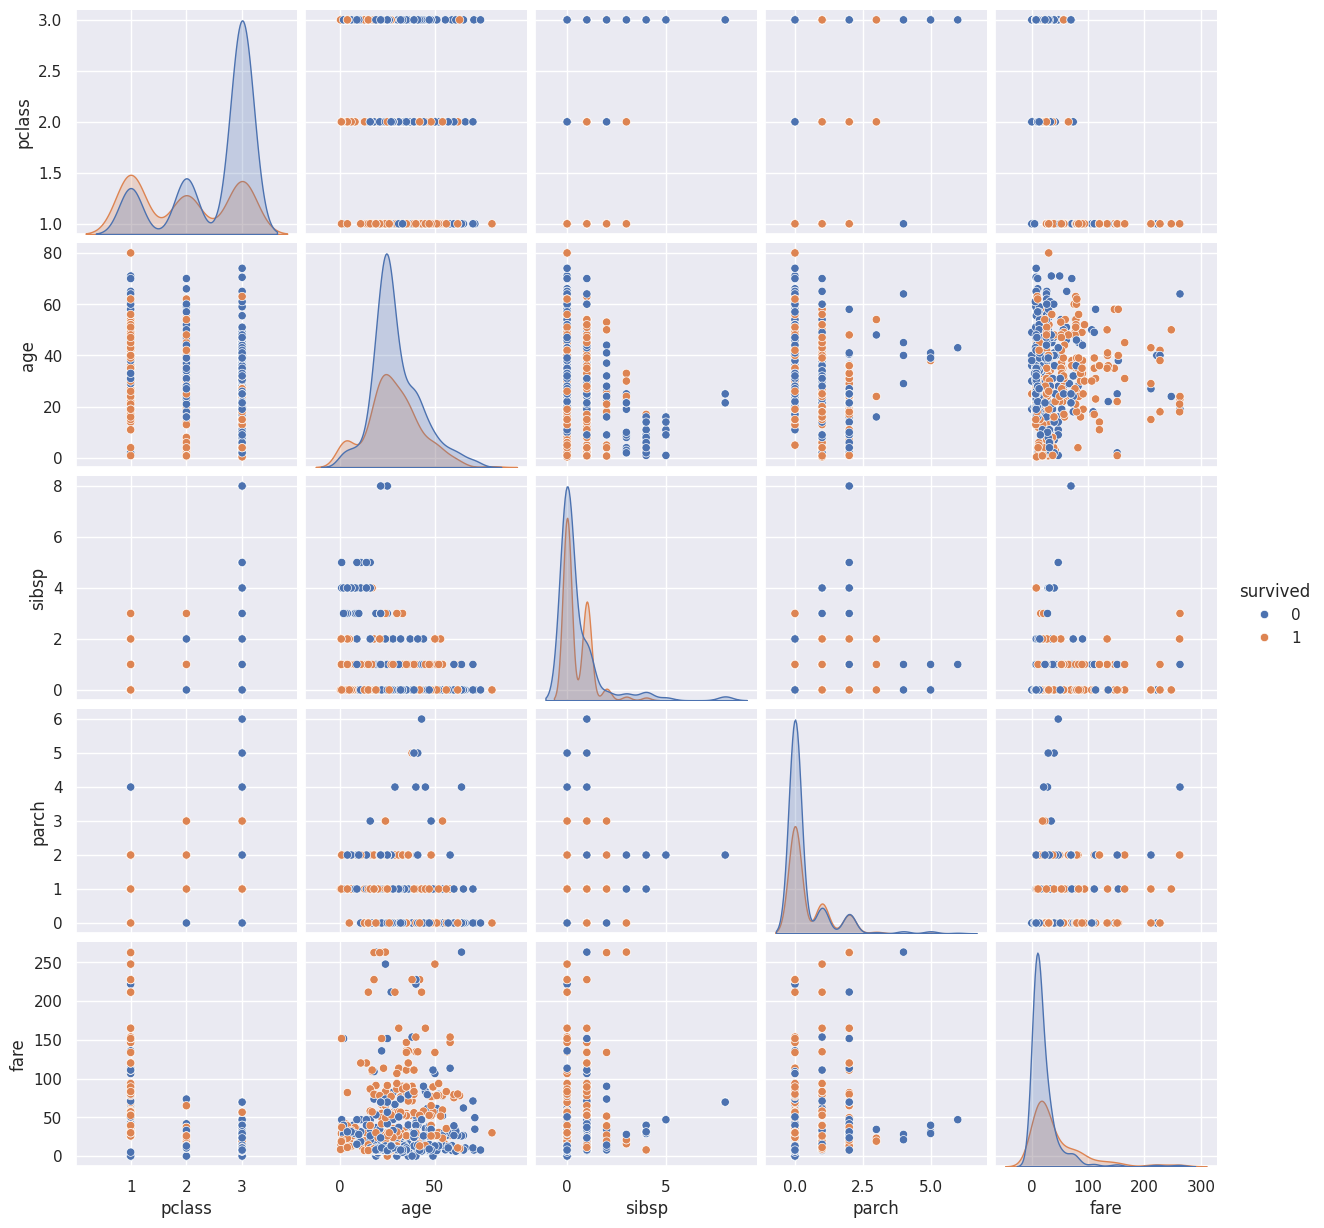

In [18]:
sns.pairplot(df,hue = 'survived')

<ipython-input-19-5ba9a6f28ac0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abs(df.corr()),annot = True)


<Axes: >

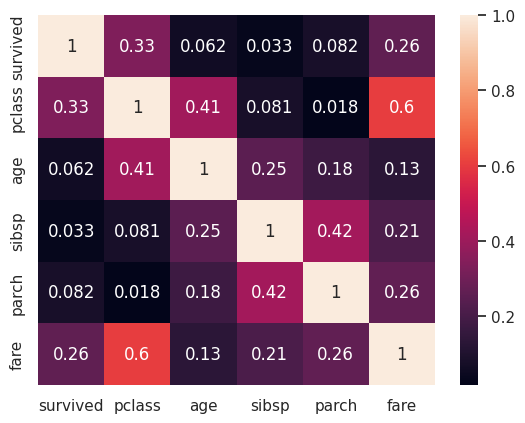

In [19]:
sns.heatmap(abs(df.corr()),annot = True)

# Conclusion

- Females had the higher chance of survival
- The 1st class had highest surviving rate
- The higher the fare the more possibility to survive